# Análisis multivariado
 A veces nuestros objetivos requieren de analizar más de dos variables a la vez. Un ejemplo de ello es la regresión multiple y la regresión logística, donde a continuación trabajaremos con ellos:

### Regresión multiple

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins  # dataset de pinguinos
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.formula.api as smf


In [36]:
# estos fueron los cambios realizados en el primer notebook
preprocess_penguins_df = palmerpenguins.load_penguins()
process_penguins_df = preprocess_penguins_df.dropna()
process_penguins_df['numeric_sex']= process_penguins_df['sex'].map({'female':0, 'male':1})


/tmp/ipykernel_5026/4212755259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  process_penguins_df['numeric_sex']= process_penguins_df['sex'].map({'female':0, 'male':1})


In [19]:
model_1 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm',
        data = process_penguins_df
    ).fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           1.54e-32
Time:                        22:43:24   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model_2 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm',
        data = process_penguins_df
    ).fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           7.04e-46
Time:                        22:43:25   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model_3 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm' ,
        data = process_penguins_df
    ).fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Wed, 25 Jan 2023   Prob (F-statistic):          9.26e-103
Time:                        22:43:26   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# añadimos la variable sex
model_4 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)' ,
        data = process_penguins_df
    ).fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Wed, 25 Jan 2023   Prob (F-statistic):          6.28e-122
Time:                        22:43:26   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# probamos el modelo con una sola varibale flipper_length_mm
model_5 = (
    smf.ols(
        formula = 'body_mass_g ~  flipper_length_mm + C(sex) + C(species)' ,
        data = process_penguins_df
    ).fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     534.0
Date:                Wed, 25 Jan 2023   Prob (F-statistic):          3.37e-142
Time:                        22:52:20   Log-Likelihood:                -2364.4
No. Observations:                 333   AIC:                             4739.
Df Residuals:                     328   BIC:                             4758.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -365.8174    532.050     -0.688      0.492   -1412.479     680.844
C(sex)[T.male]            530.3811     37.810     14.027      0.000     456.000     604.762
C(species)[T.Chinstrap]   -87.6345     46.347     -1.891      0.060    -178.810       3.541
C(species)[T.Gentoo]      836.2600     85.185      9.817      0.000     668.681    1003.839
flipper_length_mm          20.0249      2.846      7.037      0.000      14.427      25.623
==============================================================================
Omnibus:                        1.575   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.556
Skew:                           0.094   Prob(JB):                        0.459
Kurtosis:                       2.723   Cond. No.                     6.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vamos a visualizar los modelos de los resultados, para ello elaboraremos un dataframe con los resultados:

In [32]:
models_result = pd.DataFrame(
    dict(
    actual_value = process_penguins_df['body_mass_g'],
    prediction_model_1 = model_1.predict(),
    prediction_model_2 = model_2.predict(),
    prediction_model_3 = model_3.predict(),
    prediction_model_4 = model_4.predict(),                                     
    prediction_model_5 = model_5.predict(),
    species = process_penguins_df['species'],
    sex = process_penguins_df['sex']                                     
    )
)
models_result

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3789.073338,Adelie,male
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3358.816820,Adelie,female
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3539.041059,Adelie,female
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3498.991228,Adelie,female
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3969.297576,Adelie,male
...,...,...,...,...,...,...,...,...
339,4000.0,5231.825347,4706.954140,4599.187485,4455.022405,4222.086661,Chinstrap,male
340,3400.0,4164.286703,4034.121055,4274.552753,3894.857519,3591.580989,Chinstrap,female
341,3775.0,4693.716437,4475.927353,3839.563668,4063.639819,3941.737845,Chinstrap,male
342,4100.0,4797.866549,4449.296758,4720.740455,4652.013882,4282.161407,Chinstrap,male


<AxesSubplot: ylabel='Density'>

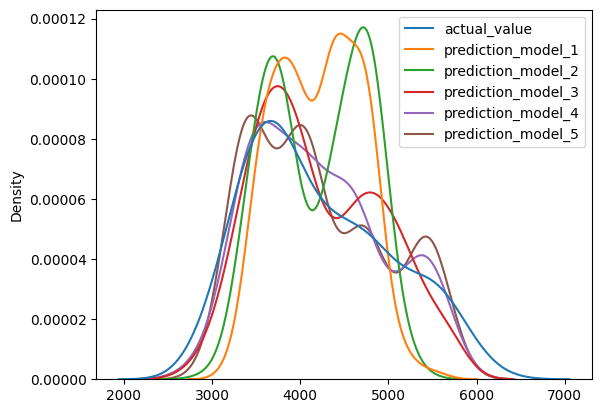

In [33]:
#visualizamos la función de distribución predicha por los modelos
sns.kdeplot(
    data = models_result
)

<AxesSubplot: ylabel='Proportion'>

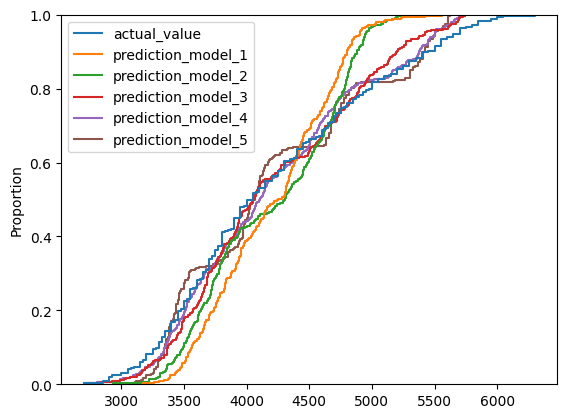

In [34]:
#visualizamos la funcion de densidad acumulada
sns.ecdfplot(
    data = models_result
)

El modelo que se acercó más es el 5, que empleaba la longitud de las alas, el sexo y la especie de los pinguinos.

### Análisis de regresión logística

Permite predecir una variable categórica con base a una o más variables. Para ello entrenaremos el modelo para que pueda predecir si un pinguino es macho o hembra:

In [39]:
smf.logit(
    formula = 'numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data = process_penguins_df,
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Thu, 26 Jan 2023   Pseudo R-squ.:                  0.4793
Time:                        00:13:16   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

La columna de "coef" indica que tan probable es que sea macho, si es negativo es menos probable, si es positivo es más probable. En el caso de las variables numéricas, mientras más grandes sea el valor, más probable es que sea macho.

In [41]:
# cuantos valores distintos hay por cada categoría
(
    process_penguins_df
    .value_counts(['island', 'sex'])
    .reset_index(name = 'count')
)

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


Vamos ahora a entrenar un modelo que determine si un pinguino es de la especie 'Adelie'

In [45]:
process_penguins_df = (
    process_penguins_df
    .assign(is_adelie = lambda df : df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1,0,0]))
)

In [47]:
model_is_adelie = smf.logit(
    formula = 'is_adelie ~ flipper_length_mm + C(sex)',
    data = process_penguins_df
).fit()

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

Los valores anteriores implican que es más probable que el pinguino sea macho si es de la especie Adelie (al obtener un valor 1.28 > 0) y que es menos probale que sea Adelie si su longitud de ala es grande (al obtener un valor -0.2 < 0).

Comparando las predicciones con los valores reales

In [48]:
is_adelie_df_predictions = pd.DataFrame(
    dict(
    actual_adelie =process_penguins_df['is_adelie'],
    predicted_values = model_is_adelie.predict().round()
    )
)

is_adelie_df_predictions

,actual_adelie,predicted_values
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0
...,...,...
339,0,0.0
340,0,0.0
341,0,1.0
342,0,0.0


In [50]:
# valores reales con sus respectivas predicciones
(
    is_adelie_df_predictions
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name ='count')
)

,actual_adelie,predicted_values,count
0,0,0.0,151
1,1,1.0,129
2,0,1.0,36
3,1,0.0,17


In [52]:
import sklearn.metrics

In [53]:
#evaluamos el modelo
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_predictions.actual_adelie,
        is_adelie_df_predictions.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_predictions.actual_adelie,
    is_adelie_df_predictions.predicted_values
)

[[151  36]
 [ 17 129]]


0.8408408408408409

Tuvimos un accuracy del 0.84, por lo que es una buena predicción.

### Paradoja de Simpson
Fenómeno en el cual es posible concluir dos cosas totalmente opuestas a partir de los mismos datos, dependiendo el como se calsifican estos.

Un ejemplo de esto es para el caso de la longitud del pico ('bill_length_mm') y la altura del pico ('bill_depth_mm')

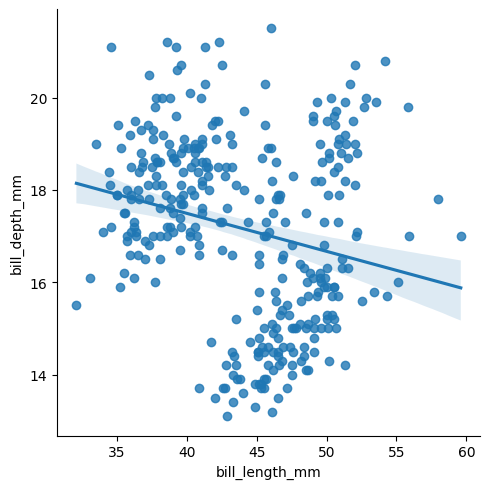

In [56]:
sns.lmplot(data = process_penguins_df,
                x = 'bill_length_mm',
                y = 'bill_depth_mm')

Al hacer una regresión lineal simple, vemos que arroja que a medida de que aumente la longitud del pico, disminuye su altura. Esto es contradictorio morfológicamente hablando y debería ser al revés ( a mayor longitud, mayor altura del pico).

Esto debido a que estos datos combinan la información de las tres especies, por lo que si las analizamos porseparados obtenemos lo siguiente:

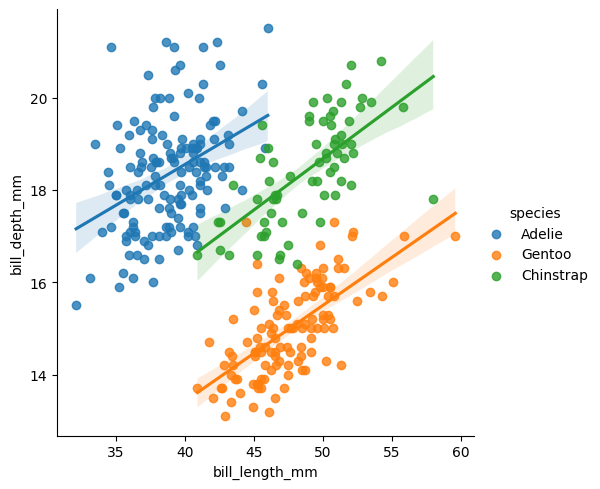

In [57]:
sns.lmplot(data = process_penguins_df,
                x = 'bill_length_mm',
                y = 'bill_depth_mm',
                hue = 'species')

Obtenemos dependencias lineales con pendiesntes positivas, lo cual ya hace mayor sentido. Lo mismo ocurre con el resto de las variables, por  lo que si las visualizamos por especies tendremos un mejor panorama:

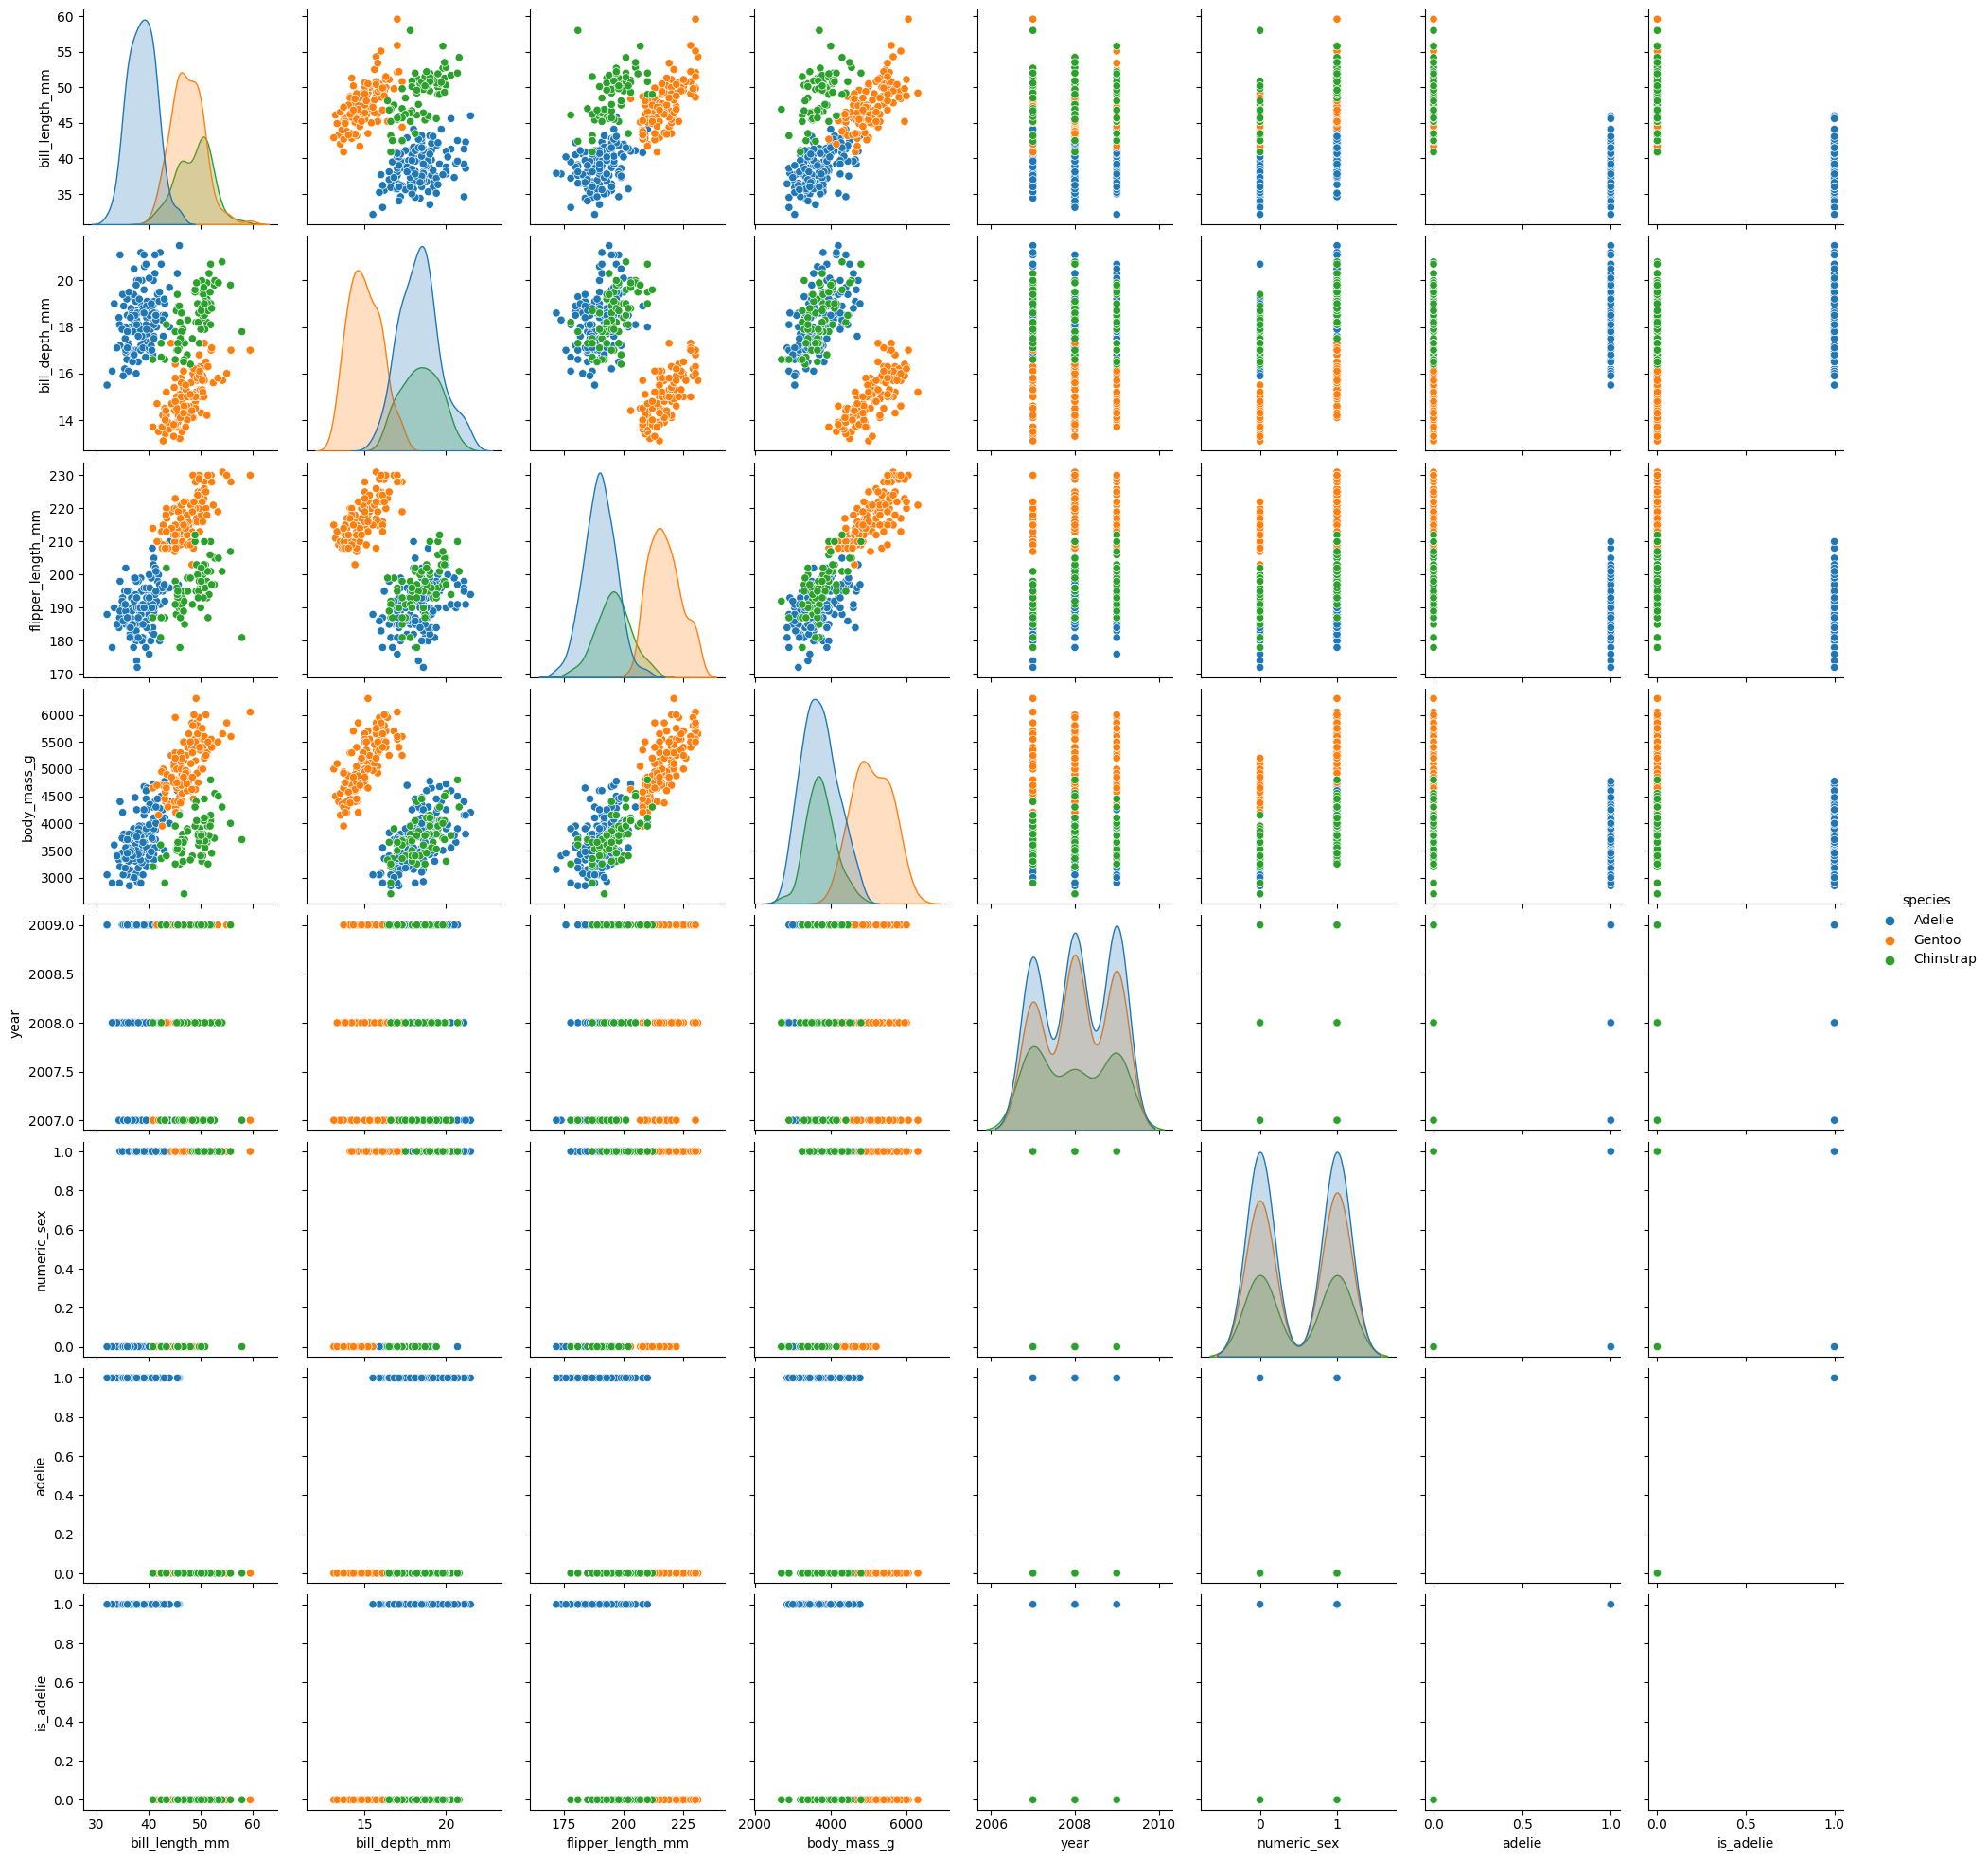

In [58]:
sns.pairplot(
    data = process_penguins_df,
    hue = 'species'
)

In [67]:
process_penguins_df.describe(include = [object, 'category'])

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


In [68]:
process_penguins_df.dtypes.value_counts()

float64    4
int64      4
object     3
dtype: int64